In [83]:
@everywhere push!(LOAD_PATH,"../src");
@everywhere push!(LOAD_PATH,"../utils");
@everywhere push!(LOAD_PATH,"../models");

In [84]:
@everywhere using Gadfly;
@everywhere using DataModel;
@everywhere using GaussianMixture;
@everywhere using MLUtilities;
@everywhere using SGMCMC;
@everywhere using HDF5;
@everywhere using JLD;
@everywhere using JuMP
@everywhere using Clp;

In [5]:
@everywhere function run_acc(s::SamplerState,dm::AbstractDataModel;num_iterations=1000, final_plot=false)
    grad = getgrad(dm)
    llik = getllik(dm)
    samples = zeros(num_iterations, length(s.x))
    acc = zeros(num_iterations)

    for i = 1:num_iterations
        acc[i] = sample!(s,llik,grad)[2][]
        samples[i,:] = s.x
    end

    if final_plot
        if length(s.x) == 2
            PyPlot.clf()
            llik(x,y) = llik([x,y])
            plot_contour(llik, -5:.05:6, -1:.05:32)
            PyPlot.scatter(samples[:,1], samples[:,2])
        end
    end

    samples, mean(acc)
end

## Stein discrepancy varying the stepsize

### RHMC, c = 1

#### VAR 1

In [ ]:
#averaging over 100 runs 
@everywhere var_ratio = 1 
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples1 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/1VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []  
for j in 1:length(samples1[:,1,1,3])
    for i in 1:length(samples1[1,1,:,3])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples1[j,:,i,3]]]
    end
end

#save("100it_VAR1stein_step_c=1.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR1stein_step_c=1.jld`)

In [ ]:
#dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR1stein_step_c=1.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies


mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_rel1 = zeros(10,80)
mat_sd_rel1 = zeros(10,80)

[mat_means_rel1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_rel1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR1.h5", "means",mat_means_rel1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR1.h5", "sd",mat_sd_rel1)

In [ ]:
#mat_sd_rel1 = h5read("/Users/Valerio/100stein_relVAR1.h5", "sd")
#mat_means_rel1 = h5read("/Users/Valerio/100stein_relVAR1.h5", "means")

#### VAR 0.5

In [ ]:
@everywhere var_ratio = 0.5
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples05 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/05VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = [] 
for j in 1:length(samples05[:,1,1,3])
    for i in 1:length(samples05[1,1,:,3])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples05[j,:,i,3]]]
    end
end

#save("100it_VAR05stein_step_c=1.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR05stein_step_c=1.jld`)

In [ ]:
#dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR05stein_step_c=1.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies


mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_rel1 = zeros(10,80)
mat_sd_rel1 = zeros(10,80)

[mat_means_rel1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_rel1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR05.h5", "means",mat_means_rel1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR05.h5", "sd",mat_sd_rel1)

#### VAR 0.3

In [ ]:
@everywhere var_ratio = 0.3
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples03 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/03VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []
for j in 1:length(samples03[:,1,1,3])
    for i in 1:length(samples03[1,1,:,3])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples03[j,:,i,3]]]
    end
end

#save("100it_VAR03stein_step_c=1.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR03stein_step_c=1.jld`)

In [ ]:
#dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR03stein_step_c=1.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies


mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_rel1 = zeros(10,80)
mat_sd_rel1 = zeros(10,80)

[mat_means_rel1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_rel1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR03.h5", "means",mat_means_rel1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_relVAR03.h5", "sd",mat_sd_rel1)

## RHMC c = 0.1

#### VAR 1

In [ ]:
@everywhere var_ratio = 1 
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples1 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/1VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []  #the different jobs now are for different STEPSIZES, not for different iterations of the same thing!
for j in 1:length(samples1[:,1,1,2])
    for i in 1:length(samples1[1,1,:,2])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples1[j,:,i,2]]]
    end
end

#save("100it_VAR1stein_step_c=01.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR1stein_step_c=01.jld`)

#### VAR 0.5

In [ ]:
@everywhere var_ratio = 0.5
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples05 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/05VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = [] 
for j in 1:length(samples05[:,1,1,2])
    for i in 1:length(samples05[1,1,:,2])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples05[j,:,i,2]]]
    end
end

#save("100it_VAR05stein_step_c=01.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR05stein_step_c=01.jld`)

#### VAR 0.3

In [ ]:
@everywhere var_ratio = 0.3
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples03 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/03VAR,10000chain.h5", "sa_rel")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []
for j in 1:length(samples03[:,1,1,2])
    for i in 1:length(samples03[1,1,:,2])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples03[j,:,i,2]]]
    end
end

#save("100it_VAR03stein_step_c=01.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR03stein_step_c=01.jld`)

## HMC

#### VAR 1

In [ ]:
@everywhere var_ratio = 1 
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples1 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/1VAR,10000chain.h5", "sa_hmc")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []  #the different jobs now are for different STEPSIZES, not for different iterations of the same thing!
for j in 1:length(samples1[:,1,1])
    for i in 1:length(samples1[1,1,:])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples1[j,:,i]]]
    end
end

#save("100it_VAR1stein_step_hmc.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR1stein_step_hmc.jld`)

In [ ]:
#dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR1stein_step_hmc.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies
mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_hmc1 = zeros(10,80)
mat_sd_hmc1 = zeros(10,80)

[mat_means_hmc1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_hmc1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR1.h5", "means",mat_means_hmc1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR1.h5", "sd",mat_sd_hmc1)


In [1]:
#mat_sd_hmc1 = h5read("/Users/Valerio/100stein_hmcVAR1.h5", "sd")
#mat_means_hmc1 = h5read("/Users/Valerio/100stein_hmcVAR1.h5", "means")

#### VAR 0.5

In [ ]:
@everywhere var_ratio = 0.5
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples05 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/05VAR,10000chain.h5", "sa_hmc")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = [] 
for j in 1:length(samples05[:,1,1])
    for i in 1:length(samples05[1,1,:])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples05[j,:,i]]]
    end
end

#save("100it_VAR05stein_step_hmc.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR05stein_step_hmc.jld`)

In [ ]:
#dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR05stein_step_hmc.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies
mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_hmc1 = zeros(10,80)
mat_sd_hmc1 = zeros(10,80)

[mat_means_hmc1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_hmc1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR05.h5", "means",mat_means_hmc1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR05.h5", "sd",mat_sd_hmc1)

#### VAR 0.3

In [ ]:
@everywhere var_ratio = 0.3
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
#samples03 = h5read("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/03VAR,10000chain.h5", "sa_hmc")

subsize=round(exp(linspace(1,log(10000),10)));

jobs = []
for j in 1:length(samples03[:,1,1])
    for i in 1:length(samples03[1,1,:])
        jobs=[jobs,["weights"=>1,"var"=>dm.var, "mu"=>dm.mu,"weights"=>dm.weights,"subsize"=>subsize,"samples"=> samples03[j,:,i]]]
    end
end

#save("100it_VAR03stein_step_hmc.jld","jobs",jobs);

In [ ]:
#run(`julia /data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/steingmmjld.jl 100it_VAR03stein_step_hmc.jld`)

In [ ]:
dic = load("/data/greyheron/oxwasp/oxwasp14/perrone/Stein_RHMC/stein_discrepancy/100it_VAR03stein_step_hmc.jld") 
jobs = dic["jobs"] ##contains 100 stein discrepancies
mat_stein = zeros(10,length(jobs))

for (i in 1:length(jobs))
    mat_stein[:,i] = jobs[i]["stein_discrepancys"] 
end

mat_means_hmc1 = zeros(10,80)
mat_sd_hmc1 = zeros(10,80)

[mat_means_hmc1[:,i] = mean(mat_stein[:,collect(i:80:8000)],2) for i=1:80]
[mat_sd_hmc1[:,i] = sqrt(var(mat_stein[:,collect(i:80:8000)],2)) for i=1:80]

#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR03.h5", "means",mat_means_hmc1)
#h5write("/data/greyheron/oxwasp/oxwasp14/perrone/RHMC/Relativistic-Stochastic-Gradient--master/examples/saved_variables/100stein_hmcVAR03.h5", "sd",mat_sd_hmc1)

#### Comparison over 100 runs of RHMC c=1 and HMC 

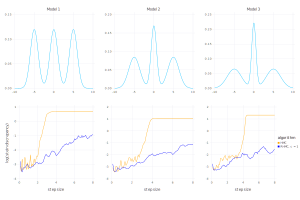

In [207]:
mat_means_hmc1 = h5read("/Users/Valerio/100stein_hmcVAR1.h5", "means")
mat_means_rel1 = h5read("/Users/Valerio/100stein_relVAR1.h5", "means")

mat_means_hmc05 = h5read("/Users/Valerio/100stein_hmcVAR05.h5", "means")
mat_means_rel05 = h5read("/Users/Valerio/100stein_relVAR05.h5", "means")

mat_means_hmc03 = h5read("/Users/Valerio/100stein_hmcVAR03.h5", "means")
mat_means_rel03 = h5read("/Users/Valerio/100stein_relVAR03.h5", "means")




set_m = collect(0.1:0.1:8.0)


stein_comp1 = Gadfly.plot(Guide.title(string("")),Guide.xlabel("step size"),Guide.ylabel("log(stein discrepancy)"),#Coord.Cartesian(ymin=0,ymax=1.8),
#Guide.xticks(ticks=collect(1:10)),
#Guide.manual_color_key("algorithm", ["RHMC","HMC"], [color("orange"), color("blue")]),
layer(
x=set_m, y=log(mat_means_rel1[10,:]),Geom.line,Theme(default_color=color("blue"))#,ymin=ymins1,ymax=ymaxs1,Geom.errorbar
)
,
layer(
x=set_m, y=log(mat_means_hmc1[10,:]), Geom.line,Theme(default_color=color("orange"))#,ymin=hymins1,ymax=hymaxs1,Geom.errorbar
)
)

stein_comp05 = Gadfly.plot(Guide.title(string("")),Guide.xlabel("step size"),Guide.ylabel(""),#Coord.Cartesian(ymin=0,ymax=1.8),
#Guide.xticks(ticks=collect(1:10)),
#Guide.manual_color_key("algorithm", ["RHMC","HMC"], [color("orange"), color("blue")]),
layer(
x=set_m, y=log(mat_means_rel05[10,:]),Geom.line,Theme(default_color=color("blue"))#,ymin=ymins05,ymax=ymaxs05,Geom.errorbar
)
,
layer(
x=set_m, y=log(mat_means_hmc05[10,:]),Geom.line,Theme(default_color=color("orange"))#,ymin=hymins05,ymax=hymaxs05,Geom.errorbar
)
)


stein_comp03 = Gadfly.plot(Guide.title(string("")),Guide.xlabel("step size"),Guide.ylabel(""),#Coord.Cartesian(ymin=0,ymax=1.8),
#Guide.xticks(ticks=collect(1:10)),
Guide.manual_color_key("algorithm", ["HMC","RHMC, c = 1"], [color("orange"), color("blue")]),
layer(
x=set_m, y=log(mat_means_rel03[10,:]), Geom.line,Theme(default_color=color("blue"))#,ymin=ymins03,ymax=ymaxs03,Geom.errorbar
)
,
layer(
x=set_m, y=log(mat_means_hmc03[10,:]), Geom.line,Theme(default_color=color("orange"))#,ymin=hymins03,ymax=hymaxs03,Geom.errorbar
)
)



@everywhere var_ratio = 1 #so that when var_ratio = 1, same variance, when var_ratio <<, the central gaussian is very peaked and the others very flat
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
r = linspace(-10,10,1000)
z = convert(Array{Float64},[getllik(dm)(x) for x in r])
model1 = Gadfly.plot(x=r, y=exp(z), Geom.line,Guide.title(string("Model 1")),Guide.xlabel(""),Guide.ylabel(""))


@everywhere var_ratio = 0.5 #so that when var_ratio = 1, same variance, when var_ratio <<, the central gaussian is very peaked and the others very flat
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
r = linspace(-10,10,1000)
z = convert(Array{Float64},[getllik(dm)(x) for x in r])
model05 = Gadfly.plot(x=r, y=exp(z), Geom.line,Guide.title(string("Model 2")),Guide.xlabel(""),Guide.ylabel(""))


@everywhere var_ratio = 0.3 #so that when var_ratio = 1, same variance, when var_ratio <<, the central gaussian is very peaked and the others very flat
@everywhere dm = GaussianMixtureModel([-5,0,5],[1/var_ratio,var_ratio,1/var_ratio],[0.3,0.3,0.3])
r = linspace(-10,10,1000)
z = convert(Array{Float64},[getllik(dm)(x) for x in r])
model03 = Gadfly.plot(x=r, y=exp(z), Geom.line,Guide.title(string("Model 3")),Guide.xlabel(""),Guide.ylabel(""))



ACC_ESS =Gadfly.draw(
SVG(30cm,20cm), 
vstack(
hstack(model1,model05,model03),
hstack(stein_comp1,stein_comp05,stein_comp03)
)
)